### 1. Objective

- The primary objective of this project is to use the k-nearest neighbors algorithm to classify handwritten digits in the MNIST dataset.
- The secondary objective is to use the final model to generate predictions for the Digit Recognizer Kaggle competition.

### 2. Data Description

- Each row and accompanying label corresponds to one 28x28 image.
- Each row includes: Values for 784 (28x28) pixels, which can range from 0 to 255 inclusive. 
- High pixel values indicate pixel darkness. 
- The training data is a set of 42000 labelled images.
- The testing data is a set of 28000 unlabelled images.
- The evaluation metric will be categorization accuracy, the proportion of test images that were correctly classified.

### 3. Exploratory Data Analysis (EDA) & Visualization

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
# Read training and testing data into DataFrames
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv') 

# Change maximum number of columns and rows displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [3]:
train.head(10) # Show the first 10 rows of training data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
test.head(10) # Show the first 10 rows of testing data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [5]:
# Display DataFrame shapes
print('Training Shape: ' + str(train.shape))
print('Testing Shape: ' + str(test.shape))

Training Shape: (42000, 785)
Testing Shape: (28000, 784)


In [6]:
# Display value counts for each of the data types
print('Training Data Type Counts: \n\n' + str(train.dtypes.value_counts()))
print()
print('Testing Data Type Counts: \n\n' + str(test.dtypes.value_counts()))

Training Data Type Counts: 

int64    785
dtype: int64

Testing Data Type Counts: 

int64    784
dtype: int64


In [7]:
# Get null value counts
print('Training Null Counts: \n\n' + str(train.isnull().sum().value_counts()))
print()
print('Testing Null Counts: \n\n' + str(test.isnull().sum().value_counts()))

Training Null Counts: 

0    785
dtype: int64

Testing Null Counts: 

0    784
dtype: int64


In [8]:
train[train['label'] == 9].head(10) # Explore training pixel values for the label 9

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

Nonzero (dark) pixel values for the label 9 seem to be grouped in similar locations within the rows. This aligns with the assumption that images of a single label may have variations in handwriting that result in small variations in dark pixel location. For example, let's say you are looking at the number 9. The loop that lies at the top of the number 9 will be at slightly different locations depending on who wrote the digit down.

In [9]:
pd.DataFrame(train[train['label'] == 9].loc[11, :]).transpose() # Explore the pixel values for row 11

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [10]:
train['label'].value_counts() # Value counts for the labels 0-9, the classes are approximately balanced.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Users\Antho\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


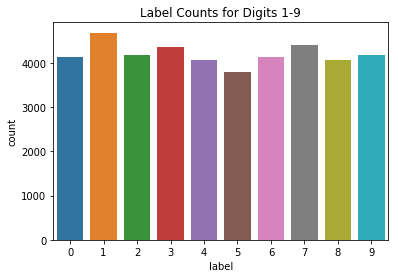

In [11]:
sns.countplot(train['label']).set_title('Label Counts for Digits 1-9');

In [12]:
print(train['pixel0'].value_counts()) # The shade of pixel0 is 0 for all training images
print()
print(test['pixel0'].value_counts()) # The shade of pixel0 is 0 for all testing images
print()
print(train['pixel38'].value_counts()) # The shade of pixel38 ranges between 0 and 255
print()
print(test['pixel38'].value_counts()) # The shade of pixel38 ranges between 0 and 255
print()
print(train['pixel358'].value_counts()) # The shade of pixel358 ranges between 0 and 255

0    42000
Name: pixel0, dtype: int64

0    28000
Name: pixel0, dtype: int64

0      41961
253        4
24         2
227        2
179        2
20         2
255        2
158        2
120        1
57         1
128        1
224        1
3          1
163        1
4          1
133        1
201        1
106        1
44         1
173        1
15         1
208        1
49         1
254        1
145        1
147        1
28         1
218        1
116        1
55         1
113        1
Name: pixel38, dtype: int64

0      27978
255        4
10         2
237        1
210        1
32         1
192        1
49         1
145        1
34         1
82         1
163        1
44         1
254        1
5          1
21         1
22         1
231        1
52         1
Name: pixel38, dtype: int64

0      35628
253     1038
252      446
254      284
255      163
       ...  
164        5
181        5
166        3
194        2
158        2
Name: pixel358, Length: 256, dtype: int64


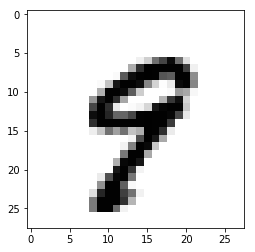

In [13]:
# Display image
plt.imshow(pd.DataFrame(train.loc[11, :].drop('label')).values.reshape(28, 28), cmap='binary', vmin=0, vmax=255, origin='upper');

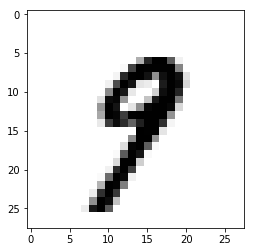

In [14]:
# Display image
plt.imshow(pd.DataFrame(train.loc[27, :].drop('label')).values.reshape(28, 28), cmap='binary', vmin=0, vmax=255, origin='upper');

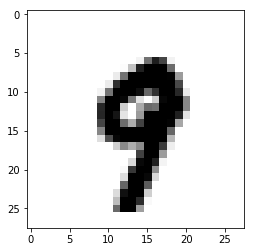

In [15]:
# Display image
plt.imshow(pd.DataFrame(train.loc[28, :].drop('label')).values.reshape(28, 28), cmap='binary', vmin=0, vmax=255, origin='upper');

Following along with the example from above: Locations and sizes vary for the loops pictured above. This confirms my assumption about the variation in pixel groups per digit. It follows that if each of the number 9's were inscribed by the same person (or machine) in exactly the same handwriting, all of the images would look the same and all of the rows corresponding to those images would be populated with the same numbers.

### 4. Preprocessing, Modeling and Evaluation

In [16]:
# Define a function to output model scores for various model parameters
def compute_knn(n_images, train, test, val, pipeline, parameters):
    
    # Create model training variables
    X = train.loc[0:n_images-1, :].drop('label', axis=1)
    y = train.loc[0:n_images-1, :]['label']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Instantiate the gridsearch object
    gs = GridSearchCV(pipeline, parameters, cv=val, verbose=2)
    
    # Fit model on the training data
    gs.fit(X_train, y_train)
    
    # Generate predictions for the unlabelled testing set
    y_pred = gs.predict(test)
    
    # Find the most accurate estimator
    final = gs.best_estimator_
    
    return final, gs.best_score_, final.score(X_test, y_test), y_pred

### Modeling - Phase 1

***Summary:***

- The models created in this phase scaled the training data and were trained on subsets of 1000 and 5000 images.
- Cross validation folds were varied for each model to establish a relationship between fold quantity and accuracy.

In [17]:
# Set up a pipeline to scale and classify
pipe = Pipeline([
    
    ('mms', MinMaxScaler()), # Default output values range from 0 to 1
    ('knn', KNeighborsClassifier())

])

In [18]:
# The pipeline parameters to gridsearch over
params = {
    
    # The number of neighbors
    'knn__n_neighbors': [1, 3, 5], 
    
    # Power parameter
    'knn__p': [1, 2], 
    
    # Weight function
    'knn__weights': ['uniform', 'distance']
    
}

In [19]:
# Create lists of model information for each value of CV folds, 1000 images
i = 2
    
model_hypers = []
best_scores = []
test_scores = []
preds = []
    
while i <= 25:

    model_hyper, best_score, test_score, pred = compute_knn(1000, train, test, i, pipe, params)
    
    model_hypers.append(model_hyper)
    best_scores.append(best_score)
    test_scores.append(test_score)
    preds.append(pred)
    
    i += 1

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..........

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.3s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ...........

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    8.2s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    9.2s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ..........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.1s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ...........

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ............

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   10.9s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   11.6s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 8 folds for each of 12 candidates, totalling 96 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..........

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   12.6s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 9 folds for each of 12 candidates, totalling 108 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   14.8s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   14.1s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 11 folds for each of 12 candidates, totalling 132 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform .......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:   14.7s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 12 folds for each of 12 candidates, totalling 144 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ...........

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   15.8s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 13 folds for each of 12 candidates, totalling 156 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ...........

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:   15.7s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 14 folds for each of 12 candidates, totalling 168 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............

[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1

[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   16.4s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   17.1s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 16 folds for each of 12 candidates, totalling 192 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform .............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..........

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   17.7s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 17 folds for each of 12 candidates, totalling 204 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s

[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:   18.3s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 18 folds for each of 12 candidates, totalling 216 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ............

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   18.9s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 19 folds for each of 12 candidates, totalling 228 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed:   20.7s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 20 folds for each of 12 candidates, totalling 240 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   20.5s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 21 folds for each of 12 candidates, totalling 252 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ........

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ........

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:   21.7s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 22 folds for each of 12 candidates, totalling 264 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform .............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ...........

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .........

[Parallel(n_jobs=1)]: Done 264 out of 264 | elapsed:   21.5s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 23 folds for each of 12 candidates, totalling 276 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 276 out of 276 | elapsed:   21.9s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 24 folds for each of 12 candidates, totalling 288 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   22.6s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 25 folds for each of 12 candidates, totalling 300 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.1

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ..........

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   0.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   23.1s finished
C:\Users\Antho\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


***Accuracy Trends:***

- This section will explore the relationship between the number of CV folds and the overall accuracy of the model.
- This is intended to establish a trend in order to choose a value for CV in the second phase of modeling.

In [20]:
# X-data
cv_folds = [i for i in range(2, 26)]

In [21]:
# This dataframe holds data from the experiment above
df = pd.DataFrame({
    'CV Folds': cv_folds,
    'Best Scores': best_scores,
    'Test Scores': test_scores
})

In [22]:
df.head()

,CV Folds,Best Scores,Test Scores
0,2,0.81250,0.825
1,3,0.83875,0.825
2,4,0.84750,0.830
3,5,0.85375,0.825
4,6,0.85125,0.835


C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


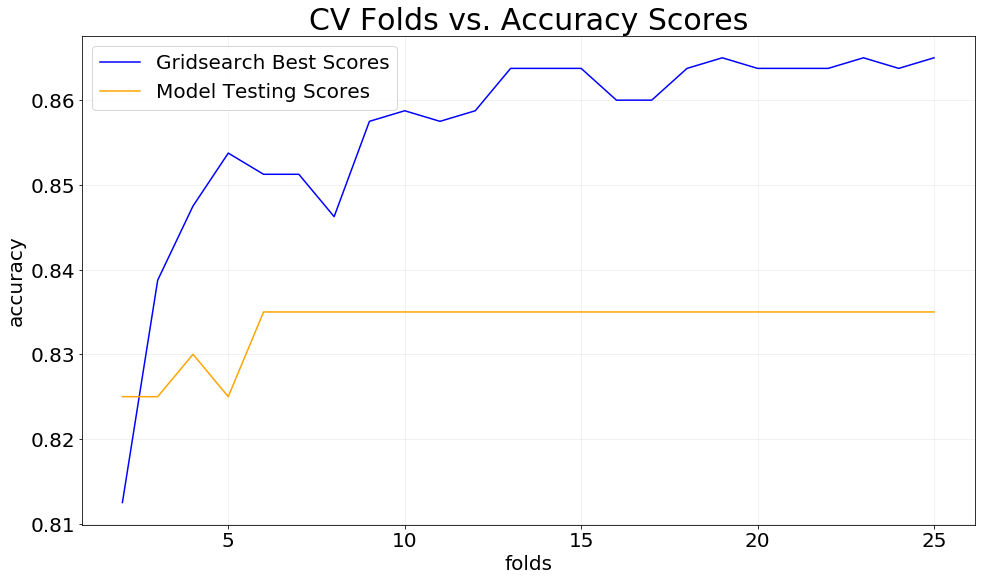

In [23]:
# Establish the size of the figure
plt.figure(figsize=(16, 9))

# Create a line plot of the best scores
plt.plot(df['CV Folds'], df['Best Scores'], c='blue', label='Gridsearch Best Scores');

# Create a line plot of the test scores
plt.plot(df['CV Folds'], df['Test Scores'], c='orange', label='Model Testing Scores');

# Create the legend and set it to the upper-hand left corner
plt.legend(loc='upper left', fontsize=20);

# Create a grid in the background
plt.grid(True, linewidth=0.5, linestyle='-', c='black', alpha=0.1)

# Create tick marks
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

# Create labels
plt.xlabel('folds', fontsize=20)
plt.ylabel('accuracy', fontsize=20)

# Create title
plt.title('CV Folds vs. Accuracy Scores', fontsize=30);

- Pictured above are trendlines that were the result of varying the number of CV folds for the model trained on 1000 images.
- There is a positive correlation between the number of folds and the best score produced by gridsearch (blue).
    - This appears to somewhat resemble a logarithmic relationship.
- There is a somewhat positive correlation between the number of folds and the model testing score (orange).
    - The influence of the number of CV folds on the model testing scores seems to diminish after cv=7.

In [24]:
# Create lists of model information for each value of CV folds, 5000 images
i = 2
    
model_hypers2 = []
best_scores2 = []
test_scores2 = []
preds2 = []
    
while i <= 25:

    model_hyper2, best_score2, test_score2, pred2 = compute_knn(5000, train, test, i, pipe, params)
    
    model_hypers2.append(model_hyper2)
    best_scores2.append(best_score2)
    test_scores2.append(test_score2)
    preds2.append(pred2)
    
    i += 1

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   6.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   6.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   5.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   5.9s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   6.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   6.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   6.4s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   6.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..........

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.5min finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   5.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   4.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   5.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   5.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   4.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   5.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   5.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   5.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ...........

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.2min finished


Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   4.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   4.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   4.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   4.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   4.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   4.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   4.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   4.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   3.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   3.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   3.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ..........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   3.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.8min finished


Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   3.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ...........

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   3.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.4s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   3.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ............

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  3.9min finished


Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   2.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance ............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   2.9s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   2.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   2.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  4.0min finished


Fitting 8 folds for each of 12 candidates, totalling 96 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.7s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.7s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform .........

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  4.2min finished


Fitting 9 folds for each of 12 candidates, totalling 108 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   2.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  4.2min finished


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   2.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   2.3s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform .............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.2s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.6min finished


Fitting 11 folds for each of 12 candidates, totalling 132 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   2.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform .......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   2.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ..........

[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:  4.4min finished


Fitting 12 folds for each of 12 candidates, totalling 144 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   2.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ...........

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  4.5min finished


Fitting 13 folds for each of 12 candidates, totalling 156 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   2.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   2.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:  4.7min finished


Fitting 14 folds for each of 12 candidates, totalling 168 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:  4.8min finished


Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform .............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ...........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  4.9min finished


Fitting 16 folds for each of 12 candidates, totalling 192 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform .........

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .......

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  5.0min finished


Fitting 17 folds for each of 12 candidates, totalling 204 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:  5.0min finished


Fitting 18 folds for each of 12 candidates, totalling 216 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.4s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform .........

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  5.2min finished


Fitting 19 folds for each of 12 candidates, totalling 228 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.9s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.8s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 228 out of 228 | elapsed:  6.4min finished


Fitting 20 folds for each of 12 candidates, totalling 240 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .......

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.7s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.6s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.9s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   1.8s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ...........

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ...........

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.5s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.4s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  7.0min finished


Fitting 21 folds for each of 12 candidates, totalling 252 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance ..........

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:  5.3min finished


Fitting 22 folds for each of 12 candidates, totalling 264 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=distance .............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform .............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 264 out of 264 | elapsed:  5.4min finished


Fitting 23 folds for each of 12 candidates, totalling 276 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[Parallel(n_jobs=1)]: Done 276 out of 276 | elapsed:  5.5min finished


Fitting 24 folds for each of 12 candidates, totalling 288 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=distance .........

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform .......

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:  5.5min finished


Fitting 25 folds for each of 12 candidates, totalling 300 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.1s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.3s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.2s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.1s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   1.3s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance ......

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.0min finished


In [25]:
# X-data
cv_folds2 = [i for i in range(2, 26)]

In [26]:
# This dataframe holds data from the experiment above
df2 = pd.DataFrame({
    'CV Folds': cv_folds2,
    'Best Scores': best_scores2,
    'Test Scores': test_scores2
})

C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Antho\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


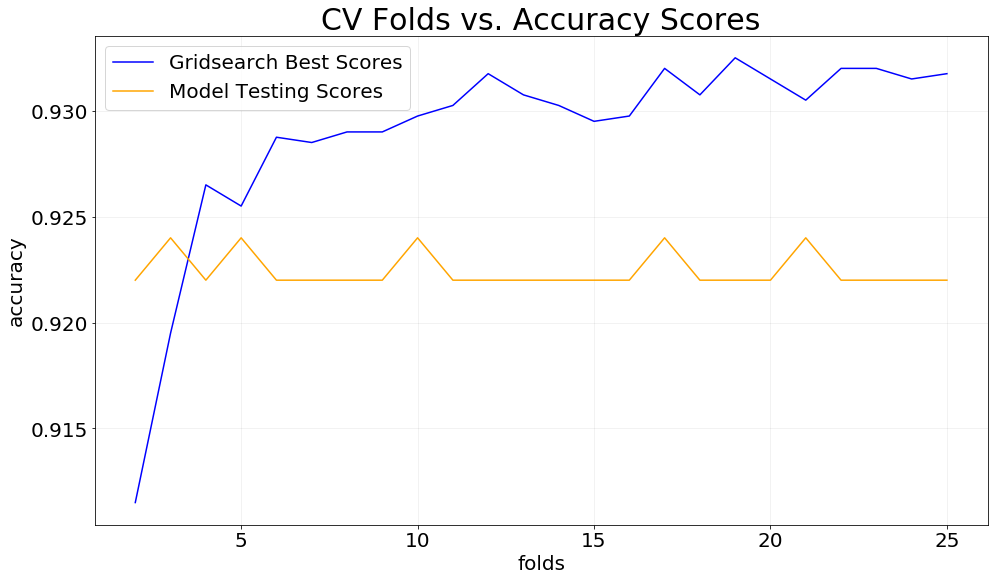

In [27]:
# Establish the size of the figure
plt.figure(figsize=(16, 9))

# Create a line plot of the best scores
plt.plot(df2['CV Folds'], df2['Best Scores'], c='blue', label='Gridsearch Best Scores');

# Create a line plot of the test scores
plt.plot(df2['CV Folds'], df2['Test Scores'], c='orange', label='Model Testing Scores');

# Create the legend and set it to the upper-hand left corner
plt.legend(loc='upper left', fontsize=20);

# Create a grid in the background
plt.grid(True, linewidth=0.5, linestyle='-', c='black', alpha=0.1)

# Create tick marks
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

# Create labels
plt.xlabel('folds', fontsize=20)
plt.ylabel('accuracy', fontsize=20)

# Create title
plt.title('CV Folds vs. Accuracy Scores', fontsize=30);

- Pictured above are trendlines that were the result of varying the number of CV folds for the model trained on 5000 images.
- There is a positive correlation between the number of folds and the best score produced by gridsearch (blue).
    - This appears to somewhat resemble a logarithmic relationship.
- There is a somewhat unclear, perhaps sinusoidal relationship between the number of folds and the testing scores in this case.

### Modeling - Phase 2

***Summary:***

- This section is the final modeling step and used all 42000 images.
- The number of cross validation folds was set at 10.
- This number was chosen to be a happy medium considering the tradeoff between processing time and accuracy improvement while varying the number of cross validation folds.
- The accuracy score produced by this section will be the final accuracy score for the Digit-Recognizer.
- Predictions resulting from this model will be submitted to Kaggle.

In [28]:
# Set up a pipeline to scale and classify
pipe2 = Pipeline([
    
    ('mms', MinMaxScaler()),
    ('knn', KNeighborsClassifier())

])

In [29]:
# The pipeline parameters to gridsearch over
params2 = {
    
    # The number of neighbors
    'knn__n_neighbors': [1, 3, 5], 
    
    # Power parameter
    'knn__p': [1, 2], 
    
    # Weight function
    'knn__weights': ['uniform', 'distance']
}

In [30]:
# Generate final model
model_hyper_final, best_score_final, test_score_final, pred_final = compute_knn(42000, train, test, 10, pipe2, params2)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total= 2.2min
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=distance, total= 2.2min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.4min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.4min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.4min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.4min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.3min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total= 2.3min
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform .............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total= 2.4min
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total= 2.4min
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total= 2.4min


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 273.8min finished


In [31]:
# Final model hyperparameters
model_hyper_final

Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='distance'))],
         verbose=False)

In [32]:
# Best model score resulting from gridsearch
best_score_final

0.9670535714285714

In [33]:
# Final testing score
test_score_final

0.9683333333333334

In [54]:
# NumPy array with final predictions
pred_final

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [62]:
# Convert to Pandas DataFrame
pred_df = pd.DataFrame(pred_final)

In [63]:
# Reindex the dataframe for Kaggle submission
pred_df.index += 1

In [64]:
# Output csv file
pred_df.to_csv('./data/submission.csv', header=['Label'], index=True, index_label='ImageId')